# Today

* More Recursion: `flatten`
* Functional programming tools in Python: `lambda`, `filter`, `map`, `reduce`

# Optional: Flattening lists

Let us write a function that will *flatten* a list, i.e. takes a list of lists, and returns a list containing all the elements that it sees in any sublists. For example: 

`[1,2,[1,2,3,4],[1,[2,[5,6]]]]` 
=> 
`[1,2,1,2,3,4,1,2,5,6]`.

With recursion, there is always a basic idea you can write down. In this case,
the flattening of a list is the flattening of the first element of the list concatenated with the flattening of the rest of the list. so we could say something like: 

`flatten(xs) = flatten(xs[0]) + flatten(xs[1:])`

Notice that `flatten(xs[0])` calls `flatten` with a number not a list. Thus what we pass to `flatten` could be a list or just a number. This is important as it allows us to decide whether we need to keep calling `flatten` or not. If the argument to `flatten` is a number then further flattening is unnecessary and we should just wrap the number up with a list and return that. Otherwise, if the argument to `flatten` is a list, then there may be nested lists to flatten, and we should call `flatten` again. Here's that implemented in code: 

In [44]:
def flatten(xs):
    if type(xs) is list: 
        return flatten(xs[0]) + flatten(xs[1:])
    else: 
        return [xs]
    
flattened_list = flatten([1,2,[3,4]])
print 'flattened list = ', flattened_list

IndexError: list index out of range

Woops! What went wrong? Looking at the traceback (error message), it seems that we can't execute `xs[0]` or `xs[1:]` because we are asking for elements that don't exist. One way to debug programs is to put in `print` statements. Let's do that right before the point where the error occurs: 

In [45]:
def flatten(xs):
    if type(xs) is list: 
        print xs
        return flatten(xs[0]) + flatten(xs[1:])
    else: 
        return [xs]
    
flattened_list = flatten([1,2,[3,4]])
print 'flattened list = ', flattened_list

[1, 2, [3, 4]]
[2, [3, 4]]
[[3, 4]]
[3, 4]
[4]
[]


IndexError: list index out of range

The output of the `print` statement shows us that we are trying to index into an empty array: at some point `xs` becomes `[]`. 

No problem, we can correct for this by putting in an additional `if` statement that checks whether `xs` is empty or not: 

In [55]:
def flatten(xs):
    if type(xs) is list: 
        if len(xs) > 0:
            return flatten(xs[0]) + flatten(xs[1:])
        else: 
            return []
    else: 
        return [xs]
    
flatten([1,2,[3,4]])

[1, 2, 3, 4]

Great! It works. Why did we return `[]`? Just because concatenating a list with an empty list doesn't change the original list, but it does serve as a way to stop the recursion because flatten only calls itself when its argument is not an empty list. 

Here's another test case: 

In [53]:
flatten([1,2,[3,4,[1,2,1,2,2,[9,9]]]])

[1, 2, 3, 4, 1, 2, 1, 2, 2, 9, 9]

# Lambda, map, reduce, filter

These expressions/functions allow you to do a lot using lists. Expecially with one-liners. 

Though `lambda` is used quite often, `map`, `reduce` and `filter` are not. However, it's important for us that we learn the ideas that they represent. That's why we will do exercises with them. 


### Lambda expressions
A lot of times we write functions like:

    def f(x,y,...):
        return ...some_expression_using_x_y_...

There is a nice shortcut. It goes like this: 

    lambda x,y,... : ...some_expression_using_x_y_...

In [1]:
f = lambda x: x*x
f(5)

25

In [2]:
(lambda x,y : x + y)(2,5)

7

`lambda` comes from *Lambda Calculus*, which was a model of computation that mathematicians thought about before computers existed. It was invented by Alonso Church (who was the advisor of Alan Turing).

### Map

Say I want to apply a function to every element in a list. Use `map`: 

`map(f,xs)` => `[f(xs[0]), f(xs[1]),...]`

In [4]:
from math import floor
map(floor, [1.234, 2.1234145, 3.42424, 4.525])

[1.0, 2.0, 3.0, 4.0]

Remark: In Python 3, we have to use `list(map(...))` to get a list. 

In fact, a `map` is the same as a list comprehension:

In [12]:
[floor(x) for x in [1.234, 2.1234145, 3.42424, 4.525]]

[1, 2, 3, 4]

We won't be using `map` much and will use list comprehension instead. The advantage of `map` is that, if you call `map(f,xs)`, then Python knows that `f(xs[0]), f(xs[1]),...` are all separate computations that don't depend on each other. So it can run each computation in parallel on separate cores of your processor (if you ask it to do so). This is called *multithreading*. 

When used, map is often combined with lambda:

In [5]:
map(lambda x: 2**x, range(15))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

This would be much more transparent with list comprehensions:

In [6]:
[2**x for x in range(15)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

### Filter

`filter(f, xs)` returns a list containing the elements of xs for which `f` returns `True` (or something else Python interprets as `True`)

In [13]:
# our trusty old isprime
# note that isprime returns bool
def isprime(n):
    if n <= 1:
        return False
    d = 2
    while d*d<=n:    # so clever!!!
        if n % d  == 0:
            return False
        d += 1
    return True

In [14]:
filter(isprime, range(20))

[2, 3, 5, 7, 11, 13, 17, 19]

But again we already knew how to do this:

In [10]:
[x for x in range(20) if isprime(x)]

[2, 3, 5, 7, 11, 13, 17, 19]

### Reduce

This is the one that's really new for us because it makes very nice one-liners. (Note: in Python 3, you'll need to import a library called `functools`.)


`reduce(f, xs)`, takes a function `f(x,y)` of two variables, and applies the function first to `x[0]` and `x[1]`, getting `f(x[0], x[1])`. And then applies `f` to `f(x[0], x[1])` and `x[2]`, getting `f(f(x[0], x[1]), x[2])`,...


In [57]:
reduce(lambda x, y: x+y, range(5))

10

Let's see what happened:

`lambda x, y: x+y` is the addition function. 

`range(5)` is `[0,1,2,3,4]`

`reduce(lambda x, y: x+y, range(5))` first computes `0+1`, takes the result `1` and adds it to `2`, then takes the result `3` and adds it to the next element, `3`, to get `6`. Finally, we add `6` to the last element of the list, `4`, to get `10`. 

Here's a picture to illustrate this process: 

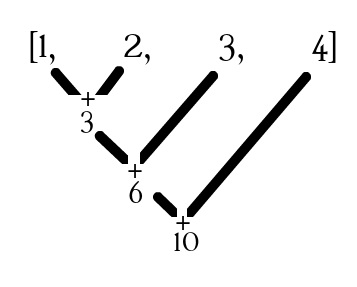

In [58]:
from IPython.display import Image, display
display(Image("reduce.png", width=400))

Next, consider this code: 

In [22]:
reduce(lambda x, y: x*y, range(1,11))

3628800

This should be $1.2.3 \ldots 10 = 10!$ Let's check:

In [23]:
import math
math.factorial(10)

3628800

Thus, we now have a new way to implement the factorial function (recall that we previously implemented it using recursion): 

In [59]:
factorial = lambda n: reduce(lambda x, y : x*y, range(1,n+1))
factorial(4)

24

As another example, consider a function `duplicate(xs,k)` that takes a list `xs` and returns the same list but with each element repeated `k` times:

## Exercises

* Using map and lambda, write a function that will take the square of each number in a list. 
* Using the above function and reduce, write a function that will return the Euclidean norm of a list/tuple, i.e. $\sqrt{x_1^2 + ... + x_n^2}$
* Optional: What is the function `apply(n,f,x)` below doing?  

In [23]:
apply = lambda n,f,x : reduce((lambda y, g : g(y)),([x] + n*[f]))

In [24]:
apply(1, lambda x: x+1, 1)

2

In [25]:
apply(3, lambda x: x*x, 2)

256